<a href="https://colab.research.google.com/github/GiacomoMM/MachineLearningFromScratch/blob/main/Homework_Fondamenti_di_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

url='https://drive.google.com/file/d/12dUeEO_rkButPD79pOteFoSSeuIBg5qt/view?usp=drive_link'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
dataset = pd.read_csv(dwn_url)
#aggiunta mia sul ordinamento casuale dei dati nel dataset
dataset=dataset.sample(frac=1)

# About The Dataset
The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition , data was collected using a web platform with a survey where anonymous users answered each question, then the information was processed obtaining 17 attributes and 2111 records.
The attributes related with eating habits are: Frequent consumption of high caloric food (**FAVC**), Frequency of consumption of vegetables (**FCVC**), Number of main meals (**NCP**), Consumption of food between meals (**CAEC**), Consumption of water daily (**CH20**), and Consumption of alcohol (**CALC**). The attributes related with the physical condition are: Calories consumption monitoring (**SCC**), Physical activity frequency (**FAF**), Time using technology devices (**TUE**), Transportation used (**MTRANS**)
variables obtained :
**Gender**, **Age**, **Height** and **Weight**.

**NObesity** values are:

* Underweight
* Normal
* Overweight
* Obesity I
* Obesity II
* Obesity III

In [ ]:
dataset

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1571,Male,37.056193,1.750150,118.206565,yes,yes,2.092830,3.0,Sometimes,no,2.077704,no,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II
1711,Male,28.986237,1.758618,113.501549,yes,yes,2.320201,3.0,Sometimes,no,2.164784,no,0.000000,1.465479,Sometimes,Automobile,Obesity_Type_II
160,Male,20.000000,1.830000,72.000000,yes,no,3.000000,3.0,Sometimes,yes,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
4,Male,22.000000,1.780000,89.800000,no,no,2.000000,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
352,Female,17.000000,1.600000,53.000000,no,yes,1.000000,3.0,Sometimes,no,1.000000,no,2.000000,2.000000,Sometimes,Walking,Normal_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366,Female,18.000000,1.649439,84.897738,yes,yes,2.000000,3.0,Sometimes,no,1.039313,no,1.000000,0.000000,no,Public_Transportation,Obesity_Type_I
492,Male,45.000000,1.700000,86.000000,no,yes,3.000000,3.0,Frequently,no,1.000000,no,0.000000,0.000000,no,Automobile,Overweight_Level_II
851,Female,21.012569,1.758628,78.370039,yes,yes,3.000000,1.0,Sometimes,no,2.000000,no,2.971832,0.000000,Sometimes,Public_Transportation,Overweight_Level_I
479,Female,17.000000,1.580000,50.000000,no,yes,1.000000,4.0,Frequently,no,2.000000,no,1.000000,2.000000,Sometimes,Public_Transportation,Normal_Weight


In [ ]:
TRAIN_TEST_SPLIT_PERCENTAGE = 0.9
dataset_training = dataset[:int(len(dataset) * TRAIN_TEST_SPLIT_PERCENTAGE)]
dataset_test = dataset[int(len(dataset) * TRAIN_TEST_SPLIT_PERCENTAGE):]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import csv
%matplotlib inline

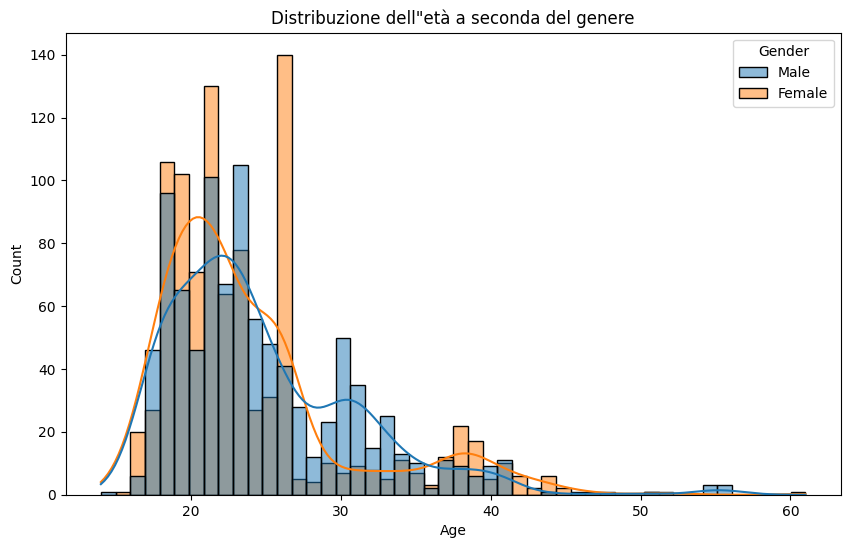

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset_training, x="Age", kde=True, hue="Gender")
plt.title("Distribuzione dell\"età a seconda del genere")
plt.show()

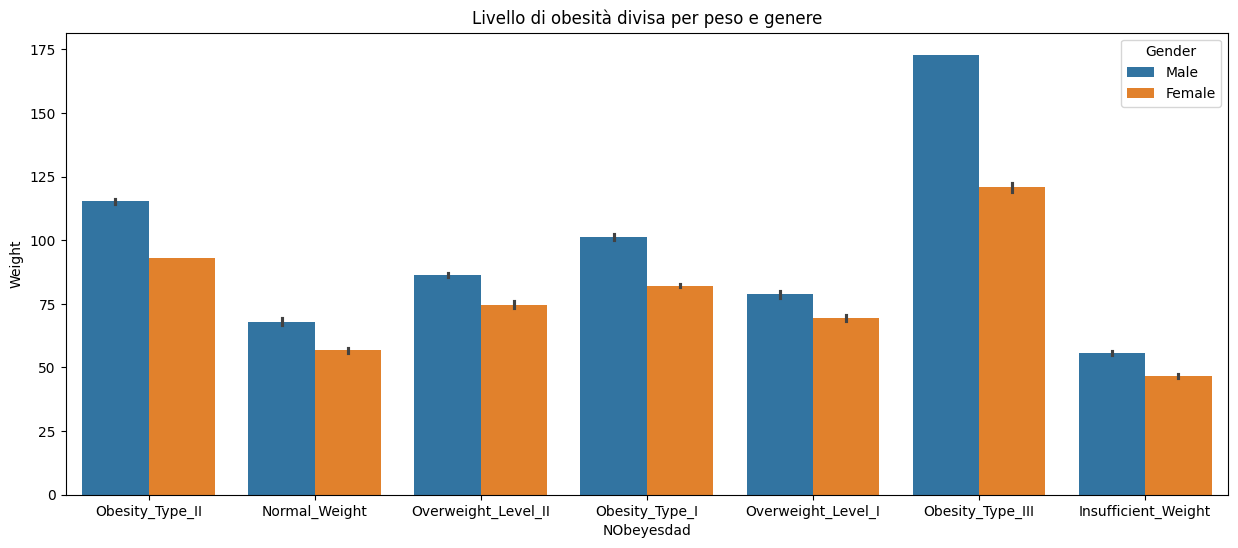

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot(data=dataset_training, x="NObeyesdad", y="Weight", hue="Gender")
plt.title("Livello di obesità divisa per peso e genere")
plt.show()

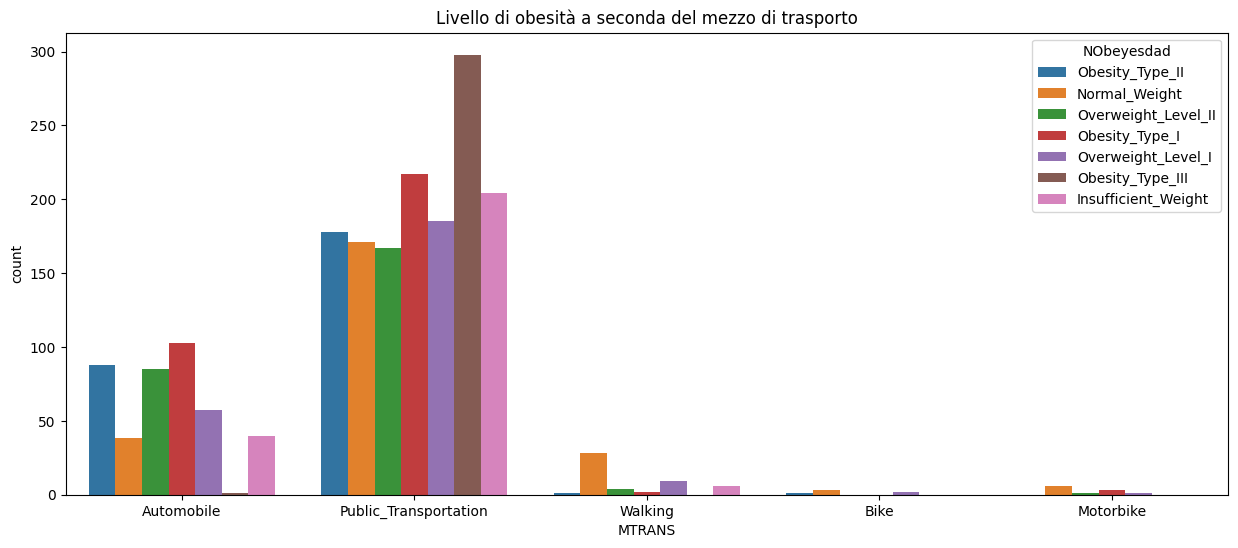

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(data=dataset_training, x="MTRANS", hue="NObeyesdad")
plt.title("Livello di obesità a seconda del mezzo di trasporto")
plt.show()

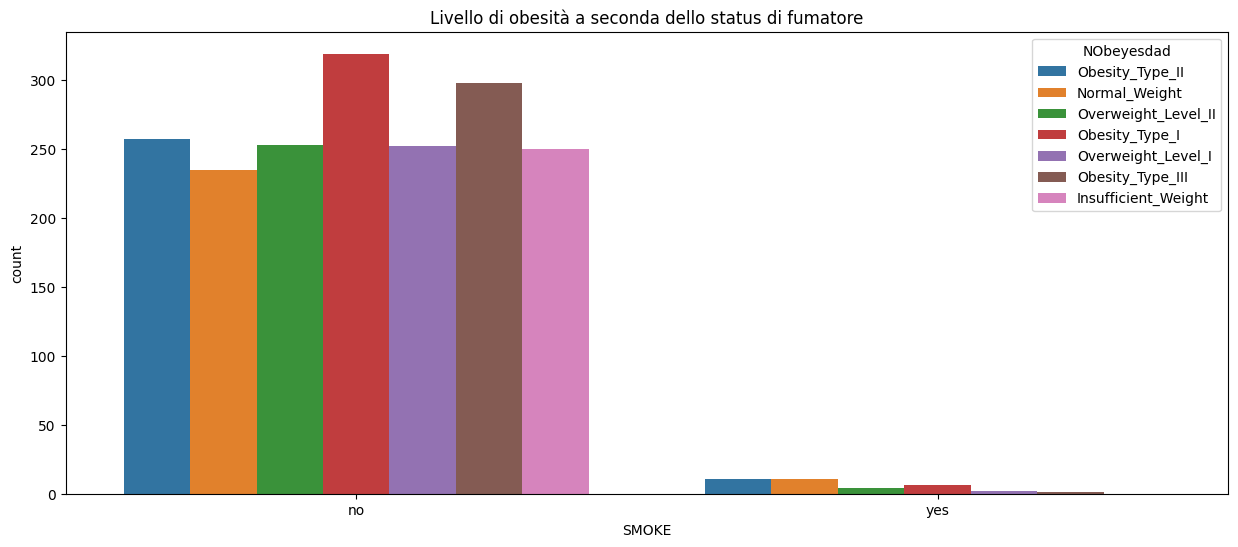

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(data=dataset_training, x="SMOKE", hue="NObeyesdad")
plt.title("Livello di obesità a seconda dello status di fumatore")
plt.show()

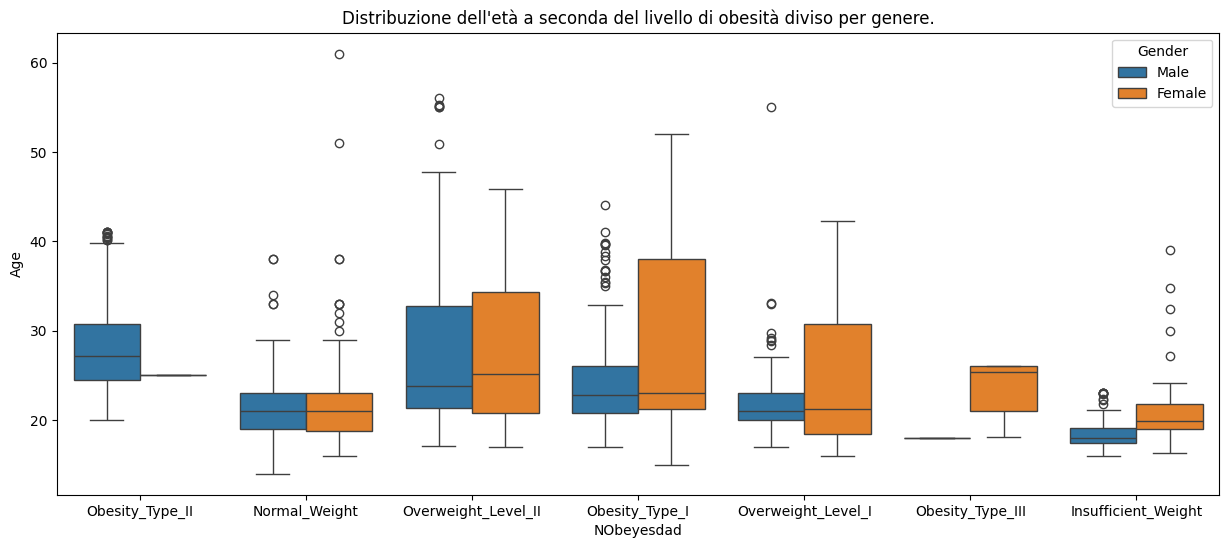

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=dataset_training, x="NObeyesdad", y="Age", hue="Gender")
plt.title("Distribuzione dell'età a seconda del livello di obesità diviso per genere.")
plt.show()

#Modifiche iniziali al dataset
I dati categorici(cioè non numerici) del dataset vengo tradotti in modo numerico, per fare ciò è stata usata la tecnica dell' One-Hot encoding.Questa tecnica consiste nel creare per ciascun valore di un attributo un nuovo attributo corrispondente al valore stesso e gli verrà assegnato un valore binario.
Per tutti gli attributi con valori delle frequenze temporali è stata eseguita una semplice sostituzione numeri: {'Always':3,'Frequently':2,'Sometimes':1,'no':0}.

In [ ]:
#modifico dataset
dataset_training_aggiornato=dataset_training.copy(deep=True)
dataset_test_aggiornato=dataset_test.copy(deep=True)

#SMOKE
dataset_training_aggiornato['Fumatore']=dataset_training_aggiornato['SMOKE'].apply(lambda cambioValore: 1 if cambioValore=='yes' else 0)
dataset_training_aggiornato['NotFumatore']=dataset_training_aggiornato['SMOKE'].apply(lambda cambioValore: 1 if cambioValore=='no' else 0)
dataset_test_aggiornato['Fumatore']=dataset_test_aggiornato['SMOKE'].apply(lambda cambioValore: 1 if cambioValore=='yes' else 0)
dataset_test_aggiornato['NotFumatore']=dataset_test_aggiornato['SMOKE'].apply(lambda cambioValore: 1 if cambioValore=='no' else 0)
#family_history_with_overweight
dataset_training_aggiornato['Family_overweight']=dataset_training_aggiornato['family_history_with_overweight'].apply(lambda cambioValore: 1 if cambioValore=='yes' else 0)
dataset_training_aggiornato['Not_Family_overweight']=dataset_training_aggiornato['family_history_with_overweight'].apply(lambda cambioValore: 1 if cambioValore=='no' else 0)
dataset_test_aggiornato['Family_overweight']=dataset_test_aggiornato['family_history_with_overweight'].apply(lambda cambioValore: 1 if cambioValore=='yes' else 0)
dataset_test_aggiornato['Not_Family_overweight']=dataset_test_aggiornato['family_history_with_overweight'].apply(lambda cambioValore: 1 if cambioValore=='no' else 0)
#FAVC
dataset_training_aggiornato['FAVC_yes']=dataset_training_aggiornato['FAVC'].apply(lambda cambioValore: 1 if cambioValore=='yes' else 0)
dataset_training_aggiornato['FAVC_no']=dataset_training_aggiornato['FAVC'].apply(lambda cambioValore: 1 if cambioValore=='no' else 0)
dataset_test_aggiornato['FAVC_yes']=dataset_test_aggiornato['FAVC'].apply(lambda cambioValore: 1 if cambioValore=='yes' else 0)
dataset_test_aggiornato['FAVC_no']=dataset_test_aggiornato['FAVC'].apply(lambda cambioValore: 1 if cambioValore=='no' else 0)
#SCC
dataset_training_aggiornato['SCC_yes']=dataset_training_aggiornato['SCC'].apply(lambda cambioValore: 1 if cambioValore=='yes' else 0)
dataset_training_aggiornato['SCC_no']=dataset_training_aggiornato['SCC'].apply(lambda cambioValore: 1 if cambioValore=='no' else 0)
dataset_test_aggiornato['SCC_yes']=dataset_test_aggiornato['SCC'].apply(lambda cambioValore: 1 if cambioValore=='yes' else 0)
dataset_test_aggiornato['SCC_no']=dataset_test_aggiornato['SCC'].apply(lambda cambioValore: 1 if cambioValore=='no' else 0)
#Gender
dataset_training_aggiornato['Maschio']=dataset_training_aggiornato['Gender'].apply(lambda cambioValore: 1 if cambioValore=='Male' else 0)
dataset_training_aggiornato['Femmina']=dataset_training_aggiornato['Gender'].apply(lambda cambioValore: 1 if cambioValore=='Female' else 0)
dataset_test_aggiornato['Maschio']=dataset_test_aggiornato['Gender'].apply(lambda cambioValore: 1 if cambioValore=='Male' else 0)
dataset_test_aggiornato['Femmina']=dataset_test_aggiornato['Gender'].apply(lambda cambioValore: 1 if cambioValore=='Female' else 0)
#dichiarazione delle associazioni frequenze
Temp_Sostituzione={'Always':3,'Frequently':2,'Sometimes':1,'no':0}
#CAEC
dataset_training_aggiornato['CAEC']=dataset_training_aggiornato['CAEC'].replace(Temp_Sostituzione)
dataset_test_aggiornato['CAEC']=dataset_test_aggiornato['CAEC'].replace(Temp_Sostituzione)
#CALC
dataset_training_aggiornato['CALC']=dataset_training_aggiornato['CALC'].replace(Temp_Sostituzione)
dataset_test_aggiornato['CALC']=dataset_test_aggiornato['CALC'].replace(Temp_Sostituzione)

#MTRANS
dataset_training_aggiornato['MTRANS_public']=dataset_training_aggiornato['MTRANS'].apply(lambda cambioValore: 1 if cambioValore=='Public_Transportation' else 0)
dataset_training_aggiornato['MTRANS_walking']=dataset_training_aggiornato['MTRANS'].apply(lambda cambioValore: 1 if cambioValore=='Walking' else 0)
dataset_training_aggiornato['MTRANS_Automobile']=dataset_training_aggiornato['MTRANS'].apply(lambda cambioValore: 1 if cambioValore=='Automobile' else 0)
dataset_training_aggiornato['MTRANS_Motorbike']=dataset_training_aggiornato['MTRANS'].apply(lambda cambioValore: 1 if cambioValore=='Motorbike' else 0)
dataset_training_aggiornato['MTRANS_Bike']=dataset_training_aggiornato['MTRANS'].apply(lambda cambioValore: 1 if cambioValore=='Bike' else 0)
dataset_test_aggiornato['MTRANS_public']=dataset_test_aggiornato['MTRANS'].apply(lambda cambioValore: 1 if cambioValore=='Public_Transportation' else 0)
dataset_test_aggiornato['MTRANS_walking']=dataset_test_aggiornato['MTRANS'].apply(lambda cambioValore: 1 if cambioValore=='Walking' else 0)
dataset_test_aggiornato['MTRANS_Automobile']=dataset_test_aggiornato['MTRANS'].apply(lambda cambioValore: 1 if cambioValore=='Automobile' else 0)
dataset_test_aggiornato['MTRANS_Motorbike']=dataset_test_aggiornato['MTRANS'].apply(lambda cambioValore: 1 if cambioValore=='Motorbike' else 0)
dataset_test_aggiornato['MTRANS_Bike']=dataset_test_aggiornato['MTRANS'].apply(lambda cambioValore: 1 if cambioValore=='Bike' else 0)

#dichiarazione delle associazioni per il peso
Temp_Sostituzione={'Normal_Weight':0, 'Overweight_Level_I':0, 'Overweight_Level_II':0,'Obesity_Type_I':1, 'Insufficient_Weight':0, 'Obesity_Type_II':1, 'Obesity_Type_III':1}
#NObeyesdad
dataset_training_aggiornato['NObeyesdad']=dataset_training_aggiornato['NObeyesdad'].replace(Temp_Sostituzione)
dataset_test_aggiornato['NObeyesdad']=dataset_test_aggiornato['NObeyesdad'].replace(Temp_Sostituzione)

#elimino colonne non necessarie
dataset_training_aggiornato=dataset_training_aggiornato.drop(columns=['SMOKE','family_history_with_overweight','FAVC','SCC','MTRANS','Gender'])
dataset_test_aggiornato=dataset_test_aggiornato.drop(columns=['SMOKE','family_history_with_overweight','FAVC','SCC','MTRANS','Gender'])



#Dati per la Regressione
Le feature(X) usate per la regressione sono:['Age', 'Height', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE','CALC', 'NObeyesdad', 'Fumatore', 'NotFumatore', 'Family_overweight','Not_Family_overweight', 'FAVC_yes', 'FAVC_no', 'SCC_yes', 'SCC_no','Maschio', 'Femmina', 'MTRANS_public', 'MTRANS_walking','MTRANS_Automobile', 'MTRANS_Motorbike', 'MTRANS_Bike'];
la target feature(Y) è ['Weight'].È stata aggiunta anche una colonna di tutti 1 che ci permette di avere un termine indipendente.(bias)

In [ ]:
#tutte le caratteristiche tranne weight
feature=['Age', 'Height', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE',
       'CALC', 'NObeyesdad', 'Fumatore', 'NotFumatore', 'Family_overweight',
       'Not_Family_overweight', 'FAVC_yes', 'FAVC_no', 'SCC_yes', 'SCC_no',
       'Maschio', 'Femmina', 'MTRANS_public', 'MTRANS_walking',
       'MTRANS_Automobile', 'MTRANS_Motorbike', 'MTRANS_Bike']

#solo weight
target=['Weight']

#associo X_test ed Y_test
X_test=dataset_test_aggiornato[feature]
Y_test=dataset_test_aggiornato[target]

#associo X_training ed Y_training
X_training=dataset_training_aggiornato[feature]
Y_training=dataset_training_aggiornato[target]

#from dataframe di pandas to array di numpy
X_training=X_training.values
Y_training=Y_training.values
X_test=X_test.values
Y_test=Y_test.values

#aggiungo come prima colonna tutti 1
X_training=np.insert(X_training,0,1,axis=1)
X_test=np.insert(X_test,0,1,axis=1)

#modifico la struttura della Y
Y_training=Y_training[:,0]
Y_test=Y_test[:,0]

#Linear Regression
La linear regression consiste nel risolvere una funzione lineare con più variabili indipendenti (nel nostro caso):
$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \hat{\beta}_2 X_2 + \ldots + \hat{\beta}_k X_k$$
dove:

*   y: è la variabile dipendente.
*   β: sono i vari coefficienti(β_0 è chiamato bias).
*   X: sono le variabili indipendenti.

Per poter risolvere la funzione bisogna assegnare ai valori dei coefficienti dei valori ottimi che minimizzino la differenza tra tra i valori osservati della variabile dipendente e i valori previsti.Per poterlo fare usiamo la tecnica dei Minimi quadrati (MSE):

$$MSE=\frac{1}{n}\sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2$$

Calcolando il gradiente ∇ di MSE e ponendolo a zero otteniamo l'equazione normale:

$$\hat{\beta} = (X^T X)^{-1} X^T y$$

Per valutare di quanto la predizione ottenuta sia differente dal valore previsto è stato usato errore quadratico medio, l'errore assoluto medio(MAE)
e la radice dell' errore quadratico medio(RMSE) confrontandoli anche con i valori di sklearn.

$$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$

$$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2}$$

In [ ]:
#Linear regreation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

#linear Regretion numpy
def linear_regretion_coefficients(X_training,Y_training):
  X_T = X_training.transpose()
  X_X = np.dot(X_T, X_training)
  X_Y = np.dot(X_T, Y_training)
  return np.linalg.solve(X_X, X_Y)

#sklearn
model = LinearRegression()
model.fit(X_training, Y_training)

#calcolo predizione numpy
def linear_regretion_predizione(X_training,Y_training,X_test):
  return X_test @ linear_regretion_coefficients(X_training,Y_training)

#calcolo predizione sklearn
Y_pred_sklearn = model.predict(X_test)

#calcolo error sklearn
mse_sklearn = mean_squared_error(Y_test, Y_pred_sklearn)
mae_sklearn=mean_absolute_error(Y_test, Y_pred_sklearn)
print("Errore quadratico medio con sk-learn:", mse_sklearn)
print("Radice errore quadratico medio con sk-learn:", math.sqrt(mse_sklearn))
print("Errore assoluto medio con sk-learn",mae_sklearn)

#calcolo error numpy
mse_numpy = mean_squared_error(Y_test, linear_regretion_predizione(X_training,Y_training,X_test))
mae_numpy=mean_absolute_error(Y_test, linear_regretion_predizione(X_training,Y_training,X_test))
print("Errore quadratico medio con numpy:", mse_numpy)
print("Radice errore quadratico medio con numpy:", math.sqrt(mse_numpy))
print("Errore assoluto medio con numpy",mae_numpy)


Errore quadratico medio con sk-learn: 124.13546574985025
Radice errore quadratico medio con sk-learn: 11.141609657040147
Errore assoluto medio con sk-learn 8.886518397193342
Errore quadratico medio con numpy: 124.13546574962888
Radice errore quadratico medio con numpy: 11.141609657030212
Errore assoluto medio con numpy 8.88651839718224


#Gradient_descend linear regression

La discesa del gradiente(gradient descend) consiste in una tecnica che ci permette di trovare dei valori per minimizzare la funzione di costo, la quale ci indica quanto le predizioni del modello sono lontane dalla realtà.

Scegliamo qualsiasi punto di inizio nello spazio dei pesi,finché non convergiamo su un punto nello spazio dei pesi con minimo Loss, per ogni w_i:

$$w_i \Leftarrow w_i-{\alpha}\frac{\partial}{\partial w_i}Loss(w)$$

Il parametro α è il learning rate che può essere costante o variare nel tempo.


Una variente più veloce è chiamata stochastic gradient descent(SGD) dove
non si lavorerà più sul dataset completo ma su un sottoinsieme dei sample
di esso(minibatch).
Per valutare i risultati sono state usate le metriche del MSE,RMSE ed MAE.

valore mean_absolute_error in funzione del learning-rate  7.844010423541921e+62  leaning rate value=  1
valore mean_absolute_error in funzione del learning-rate  7.843446873105687e+52  leaning rate value=  0.1
valore mean_absolute_error in funzione del learning-rate  7.837813372573251e+42  leaning rate value=  0.01
valore mean_absolute_error in funzione del learning-rate  7.78167832465098e+32  leaning rate value=  0.001
valore mean_absolute_error in funzione del learning-rate  7.239903888709377e+22  leaning rate value=  0.0001
valore mean_absolute_error in funzione del learning-rate  3413678392778.6387  leaning rate value=  1e-05
valore mean_absolute_error in funzione del learning-rate  21.03290200995063  leaning rate value=  1.0000000000000002e-06
valore mean_absolute_error in funzione del learning-rate  27.906720585487637  leaning rate value=  1.0000000000000002e-07
valore mean_absolute_error in funzione del learning-rate  75.11556501141672  leaning rate value=  1.0000000000000002e-0

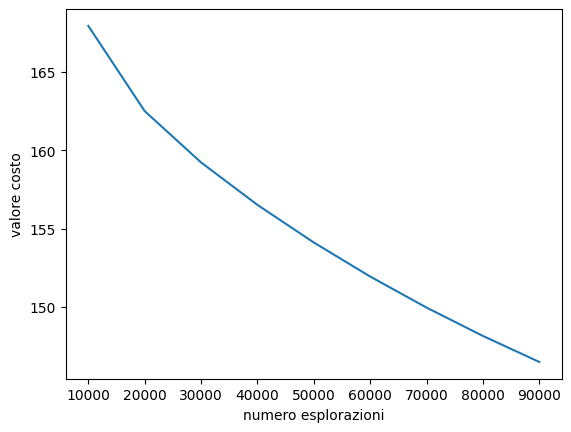

tempo con Gradient_descend 3.866394281387329 s
valore mean_absolute_error Gradient_descend 9.30870363817406  n_iterazioni=  100000
Errore quadratico medio con Gradient_descend: 135.96256244506446  n_iterazioni=  100000
Radice errore quadratico medio con Gradient_descend: 11.660298557286794  n_iterazioni=  100000
Stochastic Gradient Descent
mean_squared_error:  187.3445620772501 al iterazione: 10000
mean_squared_error:  168.8204127589243 al iterazione: 20000
mean_squared_error:  163.81660855654206 al iterazione: 30000
mean_squared_error:  161.33035353102082 al iterazione: 40000
mean_squared_error:  159.60991465240977 al iterazione: 50000
mean_squared_error:  158.20188239048258 al iterazione: 60000
mean_squared_error:  156.96247184330628 al iterazione: 70000
mean_squared_error:  155.8342425239434 al iterazione: 80000
mean_squared_error:  154.7878317759699 al iterazione: 90000


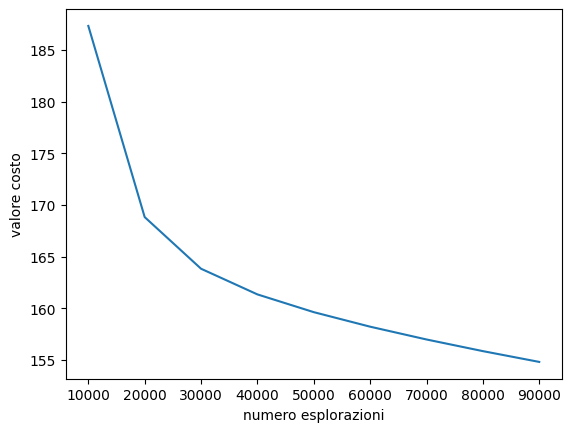

tempo con stochastic_gradient_descent 4.698910474777222 s
valore mean_absolute_error stochastic_gradient_descent 9.781300812292935  n_iterazioni=  100000
Errore quadratico medio con stochastic_gradient_descent: 152.39147337922006  n_iterazioni=  100000
Radice errore quadratico medio con stochastic_gradient_descent: 12.344694138747224  n_iterazioni=  100000


In [ ]:
import time

#Gradient_descend linear regression
def Gradient_descend(X,Y,n,rate,plot=False):
  n_righe,n_colonne=X.shape
  w=np.zeros(n_colonne)
  costoPlot=[]
  iterazionePlot=[]
  for i in range(n):
    predizione=np.dot(X,w)
    if(i%10000==0 and plot and i!=0):
      print("mean_squared_error: ",mean_squared_error(Y,predizione),"al iterazione:",i)
      costoPlot.append(mean_squared_error(Y,predizione))
      iterazionePlot.append(i)
    w-=rate*(np.dot(X.T,predizione-Y))
  if(plot):
    plt.plot(iterazionePlot,costoPlot)
    plt.xlabel("numero esplorazioni")
    plt.ylabel("valore costo")
    plt.show()
  return w

#calcolo predizione
def predizione_Gradient_descend(X_test,w):
  return np.dot(X_test,w)

#stochastic_gradient_descent
def stochastic_gradient_descent(X,Y,n,rate,batch,plot=False):
  indici=np.random.choice(X.shape[0], size=batch, replace=False)
  X=X[indici,:]
  Y=Y[indici]
  n_righe,n_colonne=X.shape
  w=np.zeros(n_colonne)
  costoPlot=[]
  iterazionePlot=[]
  for i in range(n):
    predizione=np.dot(X,w)
    if(i%10000==0 and plot and i!=0):
      print("mean_squared_error: ",mean_squared_error(Y,predizione),"al iterazione:",i)
      costoPlot.append(mean_squared_error(Y,predizione))
      iterazionePlot.append(i)
    w-=rate*(np.dot(X.T,predizione-Y))
  if(plot):
    plt.plot(iterazionePlot,costoPlot)
    plt.xlabel("numero esplorazioni")
    plt.ylabel("valore costo")
    plt.show()
  return w

rate=1
n_iterazioni=10
min=0
bestRate=0

#trovo il miglior learning-rate tra i primi 10 in funzione del mean_absolute_error
for i in range(10):
  w=Gradient_descend(X_training,Y_training,n_iterazioni,rate)
  predizione=predizione_Gradient_descend(X_test,w)
  if i==0:
    min=mean_absolute_error(Y_test,predizione)
    bestRate=rate
  else:
    if mean_absolute_error(Y_test,predizione)<min:
      min=mean_absolute_error(Y_test,predizione)
      bestRate=rate
  print("valore mean_absolute_error in funzione del learning-rate ",mean_absolute_error(Y_test,predizione)," leaning rate value= ",rate)
  rate=rate/10


#trovo un valore per n_iterazioni
print("Gradient Descent")
n_iterazioni=100000
start=time.time()
w=Gradient_descend(X_training,Y_training,n_iterazioni,bestRate,plot=True)
predizione=predizione_Gradient_descend(X_test,w)
end=time.time()
print("tempo con Gradient_descend",end-start,"s")
print("valore mean_absolute_error Gradient_descend",mean_absolute_error(Y_test,predizione)," n_iterazioni= ",n_iterazioni)
print("Errore quadratico medio con Gradient_descend:", mean_squared_error(Y_test,predizione)," n_iterazioni= ",n_iterazioni)
print("Radice errore quadratico medio con Gradient_descend:", math.sqrt(mean_squared_error(Y_test,predizione))," n_iterazioni= ",n_iterazioni)


#stochastic_gradient_descent con batch di 500 si ottiene un risultato simile
print("Stochastic Gradient Descent")
batch=500
n_iterazioni=100000
start=time.time()
w=stochastic_gradient_descent(X_training,Y_training,n_iterazioni,bestRate,batch,plot=True)
predizione=predizione_Gradient_descend(X_test,w)
end=time.time()
print("tempo con stochastic_gradient_descent",end-start,"s")
print("valore mean_absolute_error stochastic_gradient_descent",mean_absolute_error(Y_test,predizione)," n_iterazioni= ",n_iterazioni)
print("Errore quadratico medio con stochastic_gradient_descent:", mean_squared_error(Y_test,predizione)," n_iterazioni= ",n_iterazioni)
print("Radice errore quadratico medio con stochastic_gradient_descent:", math.sqrt(mean_squared_error(Y_test,predizione))," n_iterazioni= ",n_iterazioni)


#Rete Neurale
La rete neurale è strutturata da:

*   Input Layer:è il primo layer della rete che riceve i dati in input.
*   Hidden Layer:sono 1 o più layer intermedi.Ogni neurone in questi layer prende gli input dai neuroni dello strato precedente e passa il risultato a quelli dello strato successivo. Le dimensioni degli hidden possono variare; questa caratteristica permette di adattare la rete a diversi problemi.
*   Output Layer:è l'ultimo layer della rete;i numero di neuroni in questo layer dipende dal tipo di problema.

La funzione di attivazione usata nel feed-forward è la sigmoide:
$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

Il feed-forward consiste nel attraversamento unidirezionale(dall' input layer all' output layer) della rete.L' input layer riceve il vettore X ; per ogni neurone viene calcolata la combinazione lineare degli input:
$$z_j = \sum_{i=1}^{n} w_{ji} x_i + b_j$$
Ogni z_j viene passato nella funzione di attivazione, e si ripete per ogni hidden layer.
L'output layer ottiene in modo simile agli hidden layer; tuttavia, in una rete neurale per la regressione, non viene applicata la non linearità all'output finale, permettendo così di mantenere un output continuo.

La backpropagation:

*   Calcolo dell' errore tra l'output predetto e quello desiderato.
*   Propaga l'errore indietro nela rete, aggiornando i pesi utilizzando il gradiente dell'errore rispetto a ciascun peso. La derivata della funzione sigmoide è:
$$\sigma'(x) = \sigma(x) \cdot (1 - \sigma(x))$$
*   I pesi vengono aggiornati con la tecnica della discesa del gradiente.

Per valutare i risultati sono state usate le metriche del MSE,RMSE ed MAE.

In [ ]:

class NeuralNetwork:
  def __init__(self,layer,epoche,rate=1):
    self.NeuronSizeHiden=layer
    self.layer=len(layer)+2
    self.layerWeight=self.layer-1
    self.epoche=epoche
    self.rate=rate

  def sigmoid(self,x):
    return 1 / (1 + np.exp(-x))

  def sigmoid_der(self,x):
    return x*(1-x)

  def forward(self,X,epoca):
    if(epoca==0):
      for i in range(self.layerWeight):
        if(i==self.layerWeight-1):
          pred_out=np.dot(self.listLayer[i],self.listWeight[i])
          self.listLayer.append(pred_out)
          return pred_out
        elif(i==0):
          calc=np.dot(self.listLayer[i],self.listWeight[i])
          pred_hiden=self.sigmoid(calc)
          self.listLayer.append(pred_hiden)
        else:
          calc=np.dot(self.listLayer[i],self.listWeight[i])
          pred_hiden=self.sigmoid(calc)
          self.listLayer.append(pred_hiden)
    else:
      for i in range(self.layerWeight):
        if(i==self.layerWeight-1):
          pred_out=np.dot(self.listLayer[i],self.listWeight[i])
          self.listLayer[i+1]=pred_out
          return pred_out
        elif(i==0):
          calc=np.dot(X,self.listWeight[i])
          pred_hiden=self.sigmoid(calc)
          self.listLayer[i+1]=pred_hiden
        else:
          calc=np.dot(self.listLayer[i],self.listWeight[i])
          pred_hiden=self.sigmoid(calc)
          self.listLayer[i+1]=pred_hiden


  def predict(self,X):
    self.listLayer[0]=X
    for i in range(self.layerWeight):
      if(i==self.layerWeight-1):
        pred_out=np.dot(self.listLayer[i],self.listWeight[i])
        self.listLayer[i+1]=pred_out
        return pred_out
      elif(i==0):
        calc=np.dot(X,self.listWeight[i])
        pred_hiden=self.sigmoid(calc)
        self.listLayer[i+1]=pred_hiden
      else:
        calc=np.dot(self.listLayer[i],self.listWeight[i])
        pred_hiden=self.sigmoid(calc)
        self.listLayer[i+1]=pred_hiden

  def backpropagation(self,Y,pred):
    m=len(Y)
    error=1/m*np.power((pred-Y.reshape(-1,1)),2)
    for i in range(self.layerWeight):
      if(i==self.layerWeight-1):
        self.listWeight[i]+=self.rate*np.dot(self.listLayer[i].T,error)
      else:
        adj=error*self.sigmoid_der(self.listLayer[i+1])
        self.listWeight[i]+=self.rate*np.dot(self.listLayer[i].T,adj)

  def train(self,X,Y):
    self.listLayer=[]
    self.listLayer.append(X)
    self.listWeight=[]
    dim=X.shape[1]
    for i in range(self.layerWeight):
      if(i==self.layerWeight-1):
        w_output = np.random.normal(0,0.0001,(self.NeuronSizeHiden[i-1], 1))
        self.listWeight.append(w_output)
      elif(i==0):
        w_hiden = np.random.normal(0,0.0001,(dim, self.NeuronSizeHiden[i]))
        self.listWeight.append(w_hiden)
      else:
        w_hiden = np.random.normal(0,0.0001,(self.NeuronSizeHiden[i-1], self.NeuronSizeHiden[i]))
        self.listWeight.append(w_hiden)
    #ciclo sulle epoche
    for i in range(self.epoche):
      pred=self.forward(X,i)
      if(i%(self.epoche/10)==0):
        error=np.mean((np.power(pred-(Y.reshape(-1,1)),2)))
        print("Loss ",error,"epoca: ",i,"con rate:",self.rate)
      self.backpropagation(Y,pred)

#valori iperparametri
NeuronSizeHiden=[48,33,17,8]
nn=NeuralNetwork(NeuronSizeHiden,600,0.00001)
nn.train(X_training,Y_training)
prediction=nn.predict(X_test)


print("valore mean_absolute_error",mean_absolute_error(Y_test,prediction))
print("Radice errore quadratico medio", math.sqrt(mean_squared_error(Y_test,prediction)))
print("mean_squared_error ",mean_squared_error(Y_test,prediction))

Loss  8222.243715469425 epoca:  0 con rate: 1e-05
Loss  4378.186561142681 epoca:  60 con rate: 1e-05
Loss  2671.8659548721116 epoca:  120 con rate: 1e-05
Loss  1843.9721003729805 epoca:  180 con rate: 1e-05
Loss  1385.4719276017915 epoca:  240 con rate: 1e-05
Loss  1109.4538500572867 epoca:  300 con rate: 1e-05
Loss  934.8340838070042 epoca:  360 con rate: 1e-05
Loss  822.1787832156775 epoca:  420 con rate: 1e-05
Loss  750.8357821385599 epoca:  480 con rate: 1e-05
Loss  709.6445491209988 epoca:  540 con rate: 1e-05
valore mean_absolute_error 20.848347144090933
Radice errore quadratico medio 25.012931762837
mean_squared_error  625.64675537234


In [ ]:
#sklearn
from sklearn.neural_network import MLPRegressor
#con solver: adam si ottiene Mean Squared Error: 57.319472358587944

regressor = MLPRegressor(hidden_layer_sizes=(48,33,17,8), activation='logistic', solver='sgd',
                         max_iter=600, alpha=0.00001, learning_rate='constant')
regressor.fit(X_training, Y_training),

y_pred = regressor.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
print("SKlearn Mean Squared Error:", mse)


SKlearn Mean Squared Error: 628.5441475644143


#Dati per la Classificazione
Le feature(X) usate per la classificazione sono:['Age', 'Height', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE','CALC', 'Fumatore', 'NotFumatore', 'Family_overweight','Not_Family_overweight', 'FAVC_yes', 'FAVC_no', 'SCC_yes', 'SCC_no','Maschio', 'Femmina', 'MTRANS_public', 'MTRANS_walking','MTRANS_Automobile', 'MTRANS_Motorbike', 'MTRANS_Bike','Weight'];
la target feature(Y) è ['NObeyesdad'].Anche in questo caso è stata inserita una colonna di valori 1 per il bias.

In [ ]:

#tutte le caratteristiche
feature=['Age', 'Height', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE',
       'CALC', 'Fumatore', 'NotFumatore', 'Family_overweight',
       'Not_Family_overweight', 'FAVC_yes', 'FAVC_no', 'SCC_yes', 'SCC_no',
       'Maschio', 'Femmina', 'MTRANS_public', 'MTRANS_walking',
       'MTRANS_Automobile', 'MTRANS_Motorbike', 'MTRANS_Bike','Weight']

#solo NObeyesdad
target=['NObeyesdad']

#associo X_test ed Y_test
X_test=dataset_test_aggiornato[feature]
Y_test=dataset_test_aggiornato[target]

X_test=X_test.values
Y_test=Y_test.values
#associo X_training ed Y_training
X_training=dataset_training_aggiornato[feature]
Y_training=dataset_training_aggiornato[target]

X_training=X_training.values
Y_training=Y_training.values

#aggiungo come prima colonna tutti 1
X_training=np.insert(X_training,0,1,axis=1)
X_test=np.insert(X_test,0,1,axis=1)

Y_training=Y_training[:,0]
Y_test=Y_test[:,0]

#Logistic Regression
La logistic regression è un modello utilizzato per la classificazione binaria.
La funzione logistica(sigmoide) è:
$$\sigma(x) = \frac{1}{1 + e^{-x}}$$
Per aggiornare i pesi useremo la tecnica della discesa del gradiente dove si andrà a minimizzare la funzione di costo:
$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)}))]$$
Le metriche usate per valutare il modello sono:

*   Accuracy score: misura la percentuale di previsioni corrette rispetto al totale delle previsioni fatte dal modello.
*   ROC AUC score:l'AUC è uguale alla probabilità che il nostro classificatore preveda un punteggio più alto per un esempio positivo casuale, che per un esempio negativo casuale.
*   ROC Curve:per visualizzare il compromesso tra falsi positivi e falsi negativi per un dato modello, possiamo tracciare ROC curve.Traccia diversi possibili valori di TPR(True Positive Rate) e FPR(False Positive Rate) ottenuti
al variare della soglia di decisione.
*   Confusion Matrix:una matrice di confusione è una tabella che mostra le previsioni del modello rispetto ai valori effettivi nelle classi di un problema di classificazione.
È composta da quattro quadranti:True Positive veri positivi,True Negative veri negativi,False Positive casi negativi classificati come positivi e False Negative casi positivi classificati come negativi.

numero di iterazioni:  10000
nuovo test con valore alpha: 0.01
valore costo:  0.6931471805599123  al ciclo:  0
valore costo:  1.9028293312082312  al ciclo:  1000
valore costo:  1.4641938695022498  al ciclo:  2000
valore costo:  1.60412070241533  al ciclo:  3000
valore costo:  1.4611479117897406  al ciclo:  4000
valore costo:  1.395933825892843  al ciclo:  5000
valore costo:  1.3701575271284765  al ciclo:  6000
valore costo:  1.3753988539274247  al ciclo:  7000
valore costo:  1.4102427763368166  al ciclo:  8000
valore costo:  1.4046316811235553  al ciclo:  9000
valore costo:  2.280385190084679  al ciclo:  9999


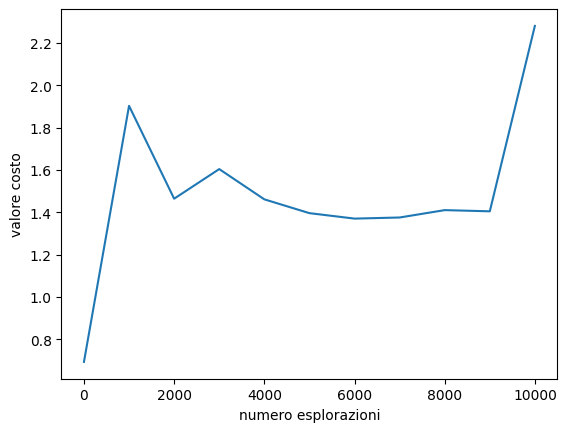

accuracy score 0.8349056603773585
nuovo test con valore alpha: 0.001
valore costo:  0.6931471805599123  al ciclo:  0
valore costo:  0.3716976610507663  al ciclo:  1000
valore costo:  0.34582564165199314  al ciclo:  2000
valore costo:  0.32282842982569226  al ciclo:  3000
valore costo:  0.30104202063504215  al ciclo:  4000
valore costo:  0.2808103961066032  al ciclo:  5000
valore costo:  0.2624093347325603  al ciclo:  6000
valore costo:  0.24594880610526504  al ciclo:  7000
valore costo:  0.23138745366898528  al ciclo:  8000
valore costo:  0.21858922077013898  al ciclo:  9000
valore costo:  0.20785564411932364  al ciclo:  9999


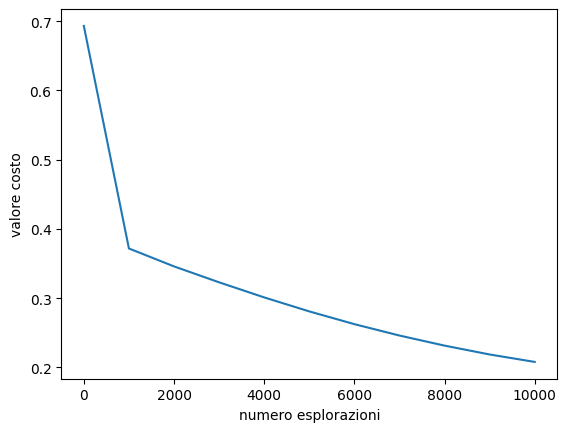

accuracy score 0.9575471698113207
nuovo test con valore alpha: 0.0001
valore costo:  0.6931471805599123  al ciclo:  0
valore costo:  0.2668302911358492  al ciclo:  1000
valore costo:  0.24082935931382138  al ciclo:  2000
valore costo:  0.23067796601842605  al ciclo:  3000
valore costo:  0.2247098976049343  al ciclo:  4000
valore costo:  0.22037655496146408  al ciclo:  5000
valore costo:  0.21684075864056632  al ciclo:  6000
valore costo:  0.21376176948684175  al ciclo:  7000
valore costo:  0.21098050841981192  al ciclo:  8000
valore costo:  0.2084147698943068  al ciclo:  9000
valore costo:  0.20602061275255543  al ciclo:  9999


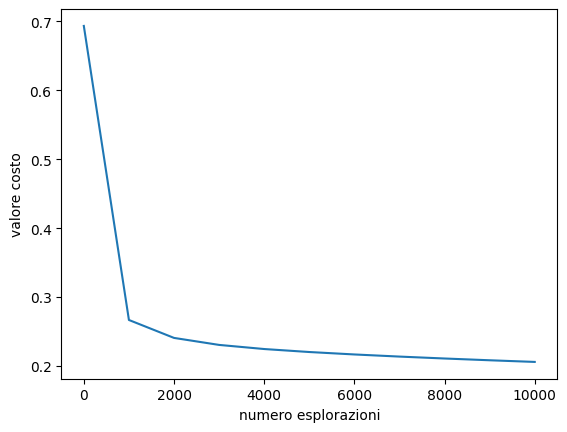

accuracy score 0.8962264150943396
nuovo test con valore alpha: 1e-05
valore costo:  0.6931471805599123  al ciclo:  0
valore costo:  0.4502626389896002  al ciclo:  1000
valore costo:  0.38114991830961176  al ciclo:  2000
valore costo:  0.3458123540714723  al ciclo:  3000
valore costo:  0.32330303350647616  al ciclo:  4000
valore costo:  0.30733407733859114  al ciclo:  5000
valore costo:  0.2952976224103889  al ciclo:  6000
valore costo:  0.2858712509015749  al ciclo:  7000
valore costo:  0.2782883699327657  al ciclo:  8000
valore costo:  0.27206248050939985  al ciclo:  9000
valore costo:  0.26686996434799404  al ciclo:  9999


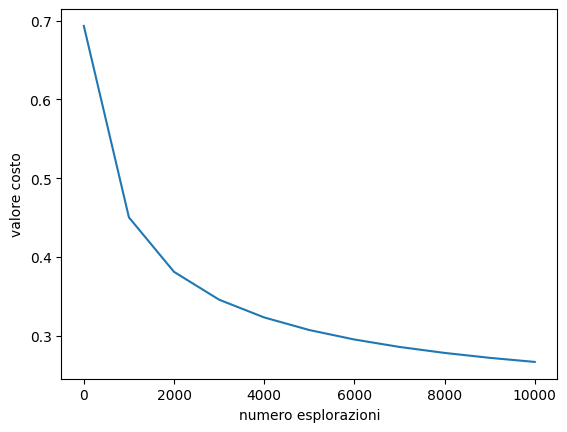

accuracy score 0.8915094339622641
nuovo test con valore alpha: 1.0000000000000002e-06
valore costo:  0.6931471805599123  al ciclo:  0
valore costo:  0.6356922241750947  al ciclo:  1000
valore costo:  0.5995662006631777  al ciclo:  2000
valore costo:  0.5694852268921988  al ciclo:  3000
valore costo:  0.544169433452299  al ciclo:  4000
valore costo:  0.5226287673394674  al ciclo:  5000
valore costo:  0.5041034587503158  al ciclo:  6000
valore costo:  0.48801016742445924  al ciclo:  7000
valore costo:  0.4738986131320854  al ciclo:  8000
valore costo:  0.46141845277522864  al ciclo:  9000
valore costo:  0.4503051057170431  al ciclo:  9999


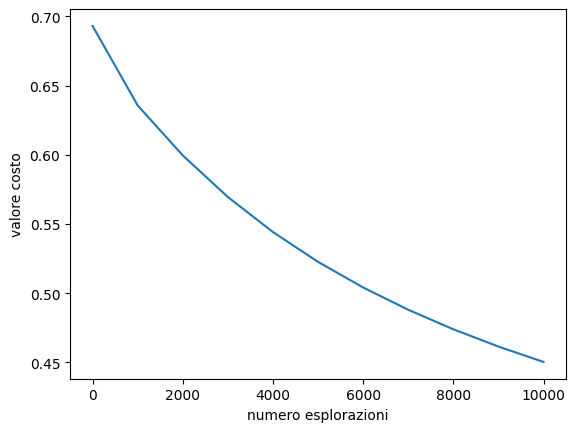

accuracy score 0.8066037735849056
nuovo test con valore alpha: 1.0000000000000002e-07
valore costo:  0.6931471805599123  al ciclo:  0
valore costo:  0.6759386083238149  al ciclo:  1000
valore costo:  0.6701367733088851  al ciclo:  2000
valore costo:  0.6654412088972436  al ciclo:  3000
valore costo:  0.6609298457921453  al ciclo:  4000
valore costo:  0.6565151461318569  al ciclo:  5000
valore costo:  0.6521870447096552  al ciclo:  6000
valore costo:  0.6479428246851429  al ciclo:  7000
valore costo:  0.6437804960588774  al ciclo:  8000
valore costo:  0.6396981679515703  al ciclo:  9000
valore costo:  0.6356979558005914  al ciclo:  9999


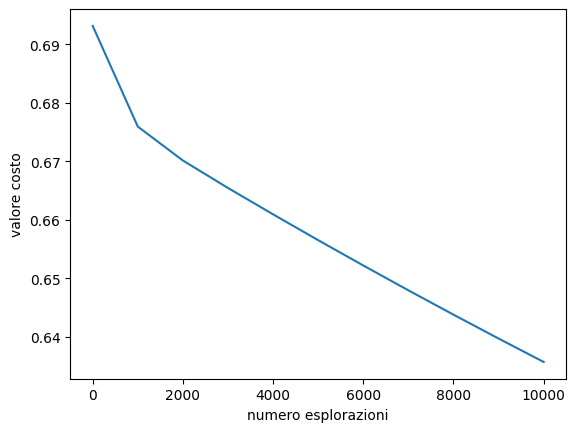

accuracy score 0.42452830188679247
nuovo test con valore alpha: 1.0000000000000002e-08
valore costo:  0.6931471805599123  al ciclo:  0
valore costo:  0.689724128926117  al ciclo:  1000
valore costo:  0.6869385463603385  al ciclo:  2000
valore costo:  0.6846521822506567  al ciclo:  3000
valore costo:  0.682756742899096  al ciclo:  4000
valore costo:  0.6811675062067489  al ciclo:  5000
valore costo:  0.6798182316814192  al ciclo:  6000
valore costo:  0.6786571370617475  al ciclo:  7000
valore costo:  0.6776437361218679  al ciclo:  8000
valore costo:  0.6767463626222898  al ciclo:  9000
valore costo:  0.6759410034555917  al ciclo:  9999


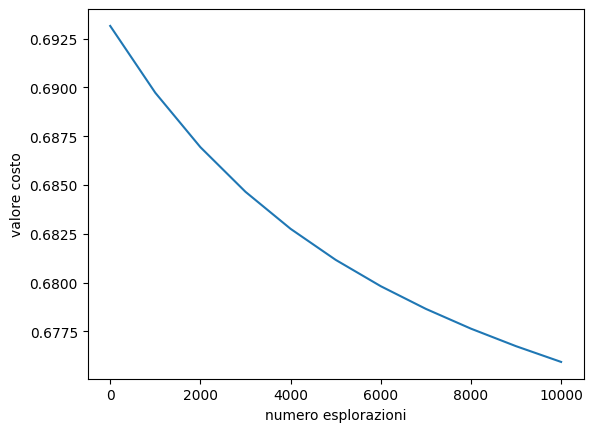

accuracy score 0.37735849056603776
nuovo test con valore alpha: 1.0000000000000003e-09
valore costo:  0.6931471805599123  al ciclo:  0
valore costo:  0.6927715253708697  al ciclo:  1000
valore costo:  0.6924037713247094  al ciclo:  2000
valore costo:  0.6920437281636654  al ciclo:  3000
valore costo:  0.6916912101419079  al ciclo:  4000
valore costo:  0.6913460359248973  al ciclo:  5000
valore costo:  0.6910080284905681  al ciclo:  6000
valore costo:  0.6906770150323323  al ciclo:  7000
valore costo:  0.6903528268638917  al ciclo:  8000
valore costo:  0.6900352993258747  al ciclo:  9000
valore costo:  0.6897245795277032  al ciclo:  9999


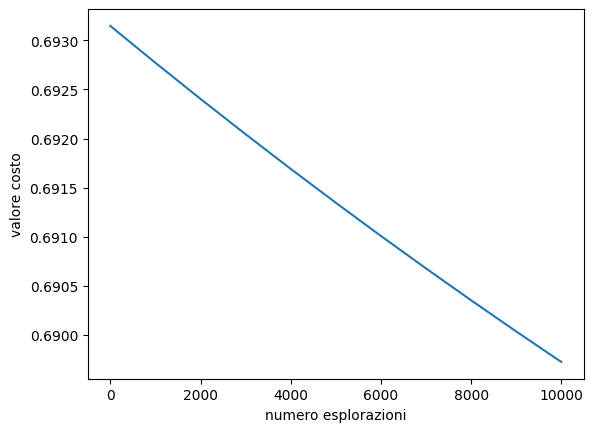

accuracy score 0.37735849056603776
logistic_regression con la bestAlpha e numero di iterazioni=10000 
valore costo:  0.6931471805599123  al ciclo:  0
valore costo:  0.3716976610507663  al ciclo:  1000
valore costo:  0.34582564165199314  al ciclo:  2000
valore costo:  0.32282842982569226  al ciclo:  3000
valore costo:  0.30104202063504215  al ciclo:  4000
valore costo:  0.2808103961066032  al ciclo:  5000
valore costo:  0.2624093347325603  al ciclo:  6000
valore costo:  0.24594880610526504  al ciclo:  7000
valore costo:  0.23138745366898528  al ciclo:  8000
valore costo:  0.21858922077013898  al ciclo:  9000
valore costo:  0.20785564411932364  al ciclo:  9999


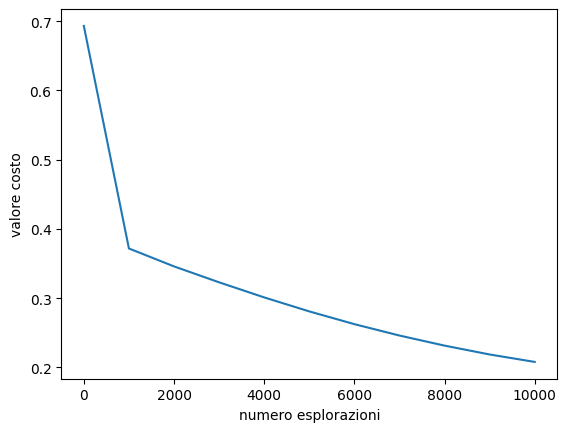

sklearn accuracy_score:  0.9056603773584906
mia accuracy_score 0.9575471698113207 con il miglior alpha=  0.001
mia roc_auc_score:  0.9486742424242425


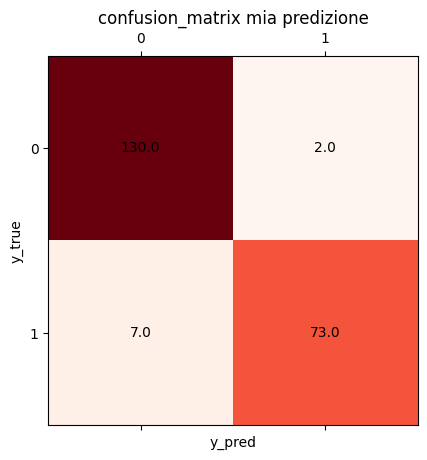

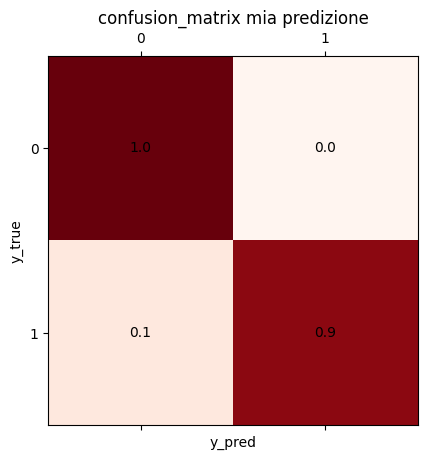

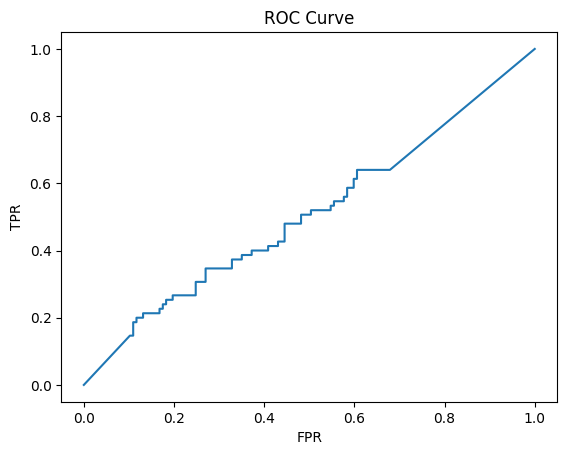

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

#logistic regression

def logistic_regression(X,Y,rate,n_iterazioni):
  n_righe,n_colonne=X.shape
  w=np.zeros(n_colonne)
  m=len(Y)
  costPlot=[]
  iterazionePlot=[]
  for i in range(n_iterazioni):
    function=logistic_funcion(X,w)
    if(i%1000==0 or i==n_iterazioni-1):
      error = (-Y * np.log(function,where=(function!=0))) - ((1-Y) * np.log(1-function,where=(1-function!=0)))
      cost = 1/m * sum(error)
      print("valore costo: ",cost ," al ciclo: ",i)
      costPlot.append(cost)
      iterazionePlot.append(i)
    w-=rate*np.dot(X.T,function-Y)
  plt.plot(iterazionePlot,costPlot)
  plt.xlabel("numero esplorazioni")
  plt.ylabel("valore costo")
  plt.show()
  return w

def logistic_funcion(X,w):
  return 1 / (1 + np.exp(-np.dot(X,w)))

def logistic_regression_prediction(X,w):
  function_pre=logistic_funcion(X,w)
  prediction=np.zeros(function_pre.shape)
  for i in range(len(function_pre)):
    if function_pre[i]<=0.5:
      prediction[i]=0
    else:
      prediction[i]=1
  return prediction

def normalization(X):
  return (X-np.mean(X))/np.std(X)



#valore rate iniziale
bestValore=0
bestlambda=0.01
Valore_lambda=0.01
n=10000
X_training_normalized=normalization(X_training)
X_test_normalized=normalization(X_test)

#cerco un buon valore per lambda
print("numero di iterazioni: " ,n)
for i in range(8):
  print("nuovo test con valore alpha:",Valore_lambda)
  w=logistic_regression(X_training_normalized,Y_training,Valore_lambda,n)
  prediction=logistic_regression_prediction(X_test_normalized,w)
  valore=accuracy_score(Y_test,prediction)
  print("accuracy score",valore)
  if(i==0):
    bestValore=valore
  else:
    if bestValore<valore:
      bestValore=valore
      bestlambda=Valore_lambda
  Valore_lambda=Valore_lambda/10.0


print("logistic_regression con la bestAlpha e numero di iterazioni=10000 ")
w=logistic_regression(X_training_normalized,Y_training,bestlambda,n)
prediction=logistic_regression_prediction(X_test_normalized,w)

clf = LogisticRegression(random_state=0, max_iter=n).fit(X_training_normalized, Y_training)
predizione_sklearn=clf.predict(X_test_normalized)

print('sklearn accuracy_score: ',accuracy_score(Y_test, predizione_sklearn))

#accuracy_score
print('mia accuracy_score',accuracy_score(Y_test,prediction),"con il miglior alpha= ",bestlambda)

#roc_auc_score
print("mia roc_auc_score: ",roc_auc_score(Y_test, prediction))


#confusion_matrix
def plot_cm(dataset):
  fig, ax= plt.subplots()
  ax.matshow(dataset, cmap='Reds')
  for (i, j), z in np.ndenumerate (dataset):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
  plt.title("confusion_matrix mia predizione")
  plt.xlabel("y_pred")
  plt.ylabel("y_true")
  plt.show()

cm=confusion_matrix(Y_test, prediction)
plot_cm(cm)
cm=confusion_matrix(Y_test, prediction, normalize="true")
plot_cm(cm)

n_true=len(Y_test)//9
n_false=len(Y_test)-n_true
preds_for_label_true= np.random.normal(0.8, 0.5, n_true).clip(0, 1)
preds_for_label_false= np.random.normal(0.2, 0.5, n_false).clip(0, 1)
y_score= np.append(preds_for_label_true, preds_for_label_false)
fpr, tpr, thresholds= roc_curve (prediction, y_score=y_score)
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()


#K-Nearest-Neighbors
Il modello K-Nearest Neighbors (KNN) è un modello non parametrico, cioè lavora diversamente da un modello di linear regression che è un modello parametrico e questi parametri coincidono con le features.
Per effettuare la classificazione, trovare l'insieme dei vicini NN(k,x) e prende il valore più frequente come valore di output.
Per evitare parità nella classificazione binaria, k dovrebbe essere scelto come numero dispari.
K è il numero di vicini da prendere.
La distanza viene calcolata con la distanza euclidea:
$$d = \sqrt{{(x_2 - x_1)}^2 + {(y_2 - y_1)}^2}$$
Le metriche usate per valutare il modello sono:

*   Accuracy score
*   ROC AUC score
*   ROC Curve
*   Confusion Matrix

accuracy_score 0.9481132075471698 con k= 1
accuracy_score 0.9528301886792453 con k= 3
accuracy_score 0.9575471698113207 con k= 5
accuracy_score 0.9481132075471698 con k= 7
accuracy_score 0.9433962264150944 con k= 9
accuracy_score 0.9292452830188679 con k= 11
accuracy_score 0.9198113207547169 con k= 13
accuracy_score 0.9198113207547169 con k= 15
accuracy_score 0.9292452830188679 con k= 17
accuracy_score 0.9292452830188679 con k= 19
mia accuracy_score 0.9575471698113207
mia roc_auc_score:  0.9659090909090909


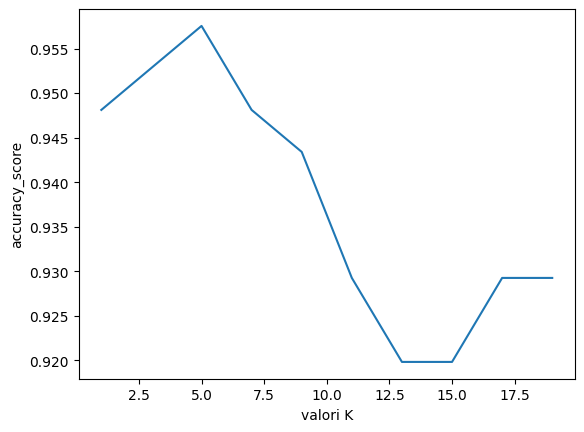

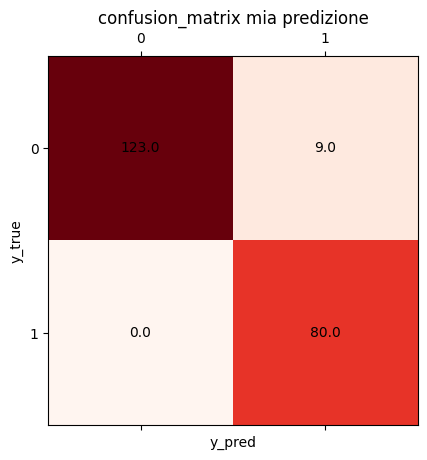

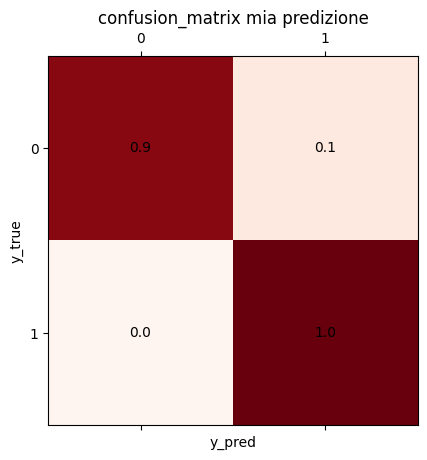

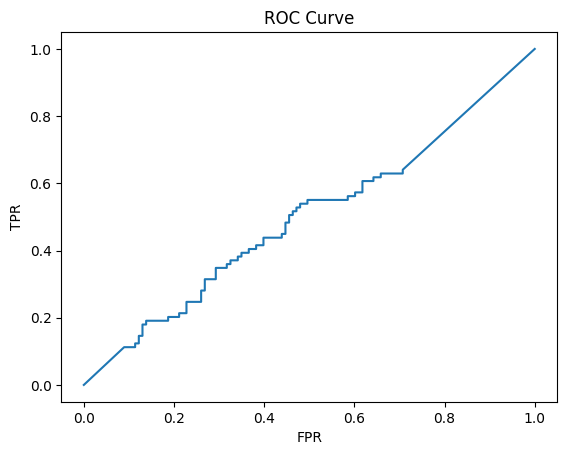

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

def normalization(X):
  return (X-np.mean(X))/np.std(X)

def distanzaEuclidea(y,x):
  return np.linalg.norm(y-x)

def predizione_KNN_classification(X_training,X_test,Y_training,k):
  predizione=[]
  for x in X_test:
    predizione.append(KNN_classification(X_training,x,Y_training,k))
  return predizione

def KNN_classification(X_training,X_test,Y_training,k):
  distanza=[]
  for x in X_training:
    distanza.append(distanzaEuclidea(X_test,x))
  indici=np.argsort(distanza)[:k]
  k_nearest=[]
  for i in indici:
    k_nearest.append(Y_training[i])
  valore_frequente = np.argmax(np.bincount(k_nearest))
  return valore_frequente

X_training_normalized=normalization(X_training)
X_test_normalized=normalization(X_test)

#cerco il miglior k tra i valori dispari minori di 20 in funzione dell' accuracy_score
bestScore=-1
bestK=-1
valoriK=[]
valoriScore=[]

for i in range(1,20,2):
  predizione=predizione_KNN_classification(X_training_normalized,X_test_normalized,Y_training,i)
  score=accuracy_score(Y_test,predizione)
  print("accuracy_score",score,"con k=",i)
  valoriK.append(i)
  valoriScore.append(score)
  if(score>=bestScore):
    bestScore=score
    bestK=i

plt.plot(valoriK,valoriScore)
plt.xlabel("valori K")
plt.ylabel("accuracy_score")
plt.show

predizione=predizione_KNN_classification(X_training_normalized,X_test_normalized,Y_training,bestK)

#accuracy_score
print('mia accuracy_score',accuracy_score(Y_test,predizione));

#roc_auc_score
print("mia roc_auc_score: ",roc_auc_score(Y_test, predizione))


#confusion_matrix
def plot_cm(dataset):
  fig, ax= plt.subplots()
  ax.matshow(dataset, cmap='Reds')
  for (i, j), z in np.ndenumerate (dataset):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
  plt.title("confusion_matrix mia predizione")
  plt.xlabel("y_pred")
  plt.ylabel("y_true")
  plt.show()

cm=confusion_matrix(Y_test, predizione)
plot_cm(cm)
cm=confusion_matrix(Y_test, predizione, normalize="true")
plot_cm(cm)

#ROC curve
n_true=len(Y_test)//9
n_false=len(Y_test)-n_true
preds_for_label_true= np.random.normal(0.8, 0.5, n_true).clip(0, 1)
preds_for_label_false= np.random.normal(0.2, 0.5, n_false).clip(0, 1)
y_score= np.append(preds_for_label_true, preds_for_label_false)
fpr, tpr, thresholds= roc_curve (predizione, y_score=y_score)
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

#Decision Tree
Il modello del decision tree è una tecnica di apprendimento supervisionata.
Un albero decisionale è una rappresentazione di una funzione che mappa un vettore di valori degli attributi per ottenere un unico valore di output: una “decisione”.L'albero esegue una serie di test che partono dalla radice fino al raggiungimento della foglia.Ogni nodo interno dell'albero corrisponde a un test sul valore di uno degli attributi di input.
L' importanza di un attributo può essere definita in termini di entropia.L'entropia è una misura dell'incertezza di una variabile casuale; più informazioni possiede l' attributo, minore sarà l'entropia.
Formula per il calcolo del Entropia:
$$H(X) = -\sum_{i=1}^{n} P(x_i) \log_2(P(x_i))$$
L'information gain derivante dal test degli attributi su A è la riduzione attesa di entropia(Ogni sottoinsieme possiede p_k esempi positivi e n_k esempi negativi):
$$\begin{equation}
\text{Remainder}(E, A) = \sum_{k=1}^{d} \frac{p_k + n_k}{p + n} \cdot \text{Entropy}(E_k)
\end{equation}$$
\begin{equation}
\text{Information Gain}(E, A) = \text{Entropy}(E) - \text{Remainder}(E, A)
\end{equation}

Le metriche usate per valutare il modello sono:

*   Accuracy score
*   ROC AUC score
*   ROC Curve
*   Confusion Matrix

In [ ]:

#definisco la classe nodo dell' albero
class Nodo:
  def __init__(self,attributo=None,threshold=None,sinistro=None,destro=None,valore=None):
    #attributo dello split
    self.attributo=attributo
    #valore del nodo
    self.valore=valore
    self.destro=destro
    self.sinistro=sinistro
    self.threshold = threshold

  #ritorno valore della foglia
  def valoreFoglia(self):
    return self.valore is not None

  def Foglia(self):
    if self.sinistro is None and self.destro is None:
      return True
    return False

#definisco la classe albero di decisione
class DecisionTree:
  def __init__(self,maxProfondita=None,numAttributi=None,MinNumValoriPerSplit=2):
    self.maxProfondita=maxProfondita
    self.numAttributi=numAttributi
    self.MinNumValoriPerSplit=MinNumValoriPerSplit
    self.Radice=None

  #funzione calcolo profondita albero
  def altezza(self,nodo):
      if nodo.Foglia():
        return 0
      destro=self.altezza(nodo.destro)
      sinistro=self.altezza(nodo.sinistro)
      return max(sinistro, destro)+1

  #inserisco valori per il numero di attributi e
  #mantengo riferimento della radice
  def inizializza(self,X,Y):
    self.numAttributi=X.shape[1]
    self.Radice=self.crescitaAlbero(X,Y)

  #funzione per costruireAlbero
  def crescitaAlbero(self,X,Y,profondita=0):
    nRighe,nColonne=X.shape
    nValoriY=len(np.unique(Y))

    #criterio di fermare la crescita
    if profondita>=self.maxProfondita or nValoriY==1 or nRighe<self.MinNumValoriPerSplit:
      valore=self.ValorePiuComune(Y)
      return Nodo(valore=valore)

    #array degl indici delle colonne
    indici=np.arange(0,nColonne)

    #cerco il miglior split
    migliorAttributo,migliorThreshold= self.MigliorSplit(X, Y, indici)

    indiceSinistro, indiceDestro = self.split(X[:, migliorAttributo], migliorThreshold)

    #chiamata ricorsiva sul sinistro
    sinistroFiglio = self.crescitaAlbero(X[indiceSinistro, :], Y[indiceSinistro], profondita+1)
    #chiamata ricorsiva sul destro
    destroFiglio = self.crescitaAlbero(X[indiceDestro, :], Y[indiceDestro], profondita+1)
    return Nodo(migliorAttributo, migliorThreshold, sinistroFiglio, destroFiglio)

  def MigliorSplit(self,X, Y, indici):
    migliorGain=-1
    splitIndice=None
    splitThreshold=None
    for idx in indici:
       Xcolonna=X[:,idx]
       threshold = np.mean(Xcolonna)
       gain = self.information_gain(Y, Xcolonna,threshold)
       #verifico se è il miglior gain ottenuto
       if gain>migliorGain:
        migliorGain=gain
        splitIndice=idx
        splitThreshold=threshold
    return splitIndice,splitThreshold

  #calcolo informationGain
  def information_gain(self,Y,Xcolonna,threshold):
    #calcolo entropia genitore
    entropiaGenitore=self.entropia(Y)
    #calcolo migliori indici per lo split
    indiceSinistro,IndiceDestro=self.split(Xcolonna,threshold)
    lunghezzaFiglioSinistro, lunghezzaFiglioDestro = len(indiceSinistro), len(IndiceDestro)
    #se la lunghezza degl indiceSinistro/indiceDestoro è zero ritorna un gain 0
    if lunghezzaFiglioSinistro==0 or lunghezzaFiglioDestro==0:
      return 0
    lunghezzaGenitore = len(Y)
    #calcolo entropia figli pesata
    entropiaSinistro, entropiaDestro = self.entropia(Y[indiceSinistro]), self.entropia(Y[IndiceDestro])
    entorpiaFigli = (lunghezzaFiglioSinistro/lunghezzaGenitore) * entropiaSinistro + (lunghezzaFiglioDestro/lunghezzaGenitore) * entropiaDestro
    #calcolo informationGain
    informationGain = entropiaGenitore - entorpiaFigli
    return informationGain

  def split(self,Xcolonna,threshold):
    indiceSinistro = np.argwhere(Xcolonna <= threshold).flatten()
    IndiceDestro = np.argwhere(Xcolonna > threshold).flatten()
    return indiceSinistro,IndiceDestro

  #calcolo del entropia
  def entropia(self,Y):
    valore,numero=np.unique(Y,return_counts=True)
    if len(numero)==1 or len(Y)==0:
      return 0
    pos=numero[0]
    p=(pos)/len(Y)
    return  -(p*math.log2(p)+(1-p)*math.log2(1-p))

  def ValorePiuComune(self,Y):
    valore,numero=np.unique(Y,return_counts=True)
    if len(numero)==0:
      return valore
    indice=np.argmax(numero)
    return valore[indice]

  def predict(self,Y):
    predizione=[]
    for y in Y:
      #inizio lo scorrimento dell' albero
      predizione.append(self.scorriAlbero_iterativo(y,self.Radice))
    return predizione

  #scelgo quello iterativo perchè:
  #tempo con scorriAlbero_iterativo: 0.0005371570587158203 s
  #tempo con scorriAlbero: 0.0013470649719238281 s
  def scorriAlbero_iterativo(self,y,nodo):
    while True:
      if nodo.valoreFoglia():
        return nodo.valore
      if y[nodo.attributo] <= nodo.threshold:
        nodo=nodo.sinistro
      else:
        nodo=nodo.destro

  def scorriAlbero(self,y,nodo):
    #verifico se è una foglia
    if nodo.valoreFoglia():
      return nodo.valore
    #verifico in base al valore del threshold per vedere quale ramo scegliere
    if y[nodo.attributo] <= nodo.threshold:
      return self.scorriAlbero(y, nodo.sinistro)
    return self.scorriAlbero(y, nodo.destro)

tempo per inizializzazione albero:  0.009756803512573242 s
tempo per calcolo predizione:  0.0001926422119140625 s
il mio accuracy_score:  0.8962264150943396 ad altezza 1
tempo per inizializzazione albero:  0.01644110679626465 s
tempo per calcolo predizione:  0.00027942657470703125 s
il mio accuracy_score:  0.8962264150943396 ad altezza 2
tempo per inizializzazione albero:  0.022188186645507812 s
tempo per calcolo predizione:  0.00029730796813964844 s
il mio accuracy_score:  0.8962264150943396 ad altezza 3
tempo per inizializzazione albero:  0.027521371841430664 s
tempo per calcolo predizione:  0.0003521442413330078 s
il mio accuracy_score:  0.9339622641509434 ad altezza 4
tempo per inizializzazione albero:  0.039899349212646484 s
tempo per calcolo predizione:  0.0003559589385986328 s
il mio accuracy_score:  0.9339622641509434 ad altezza 5
tempo per inizializzazione albero:  0.05112648010253906 s
tempo per calcolo predizione:  0.00035381317138671875 s
il mio accuracy_score:  0.985849056

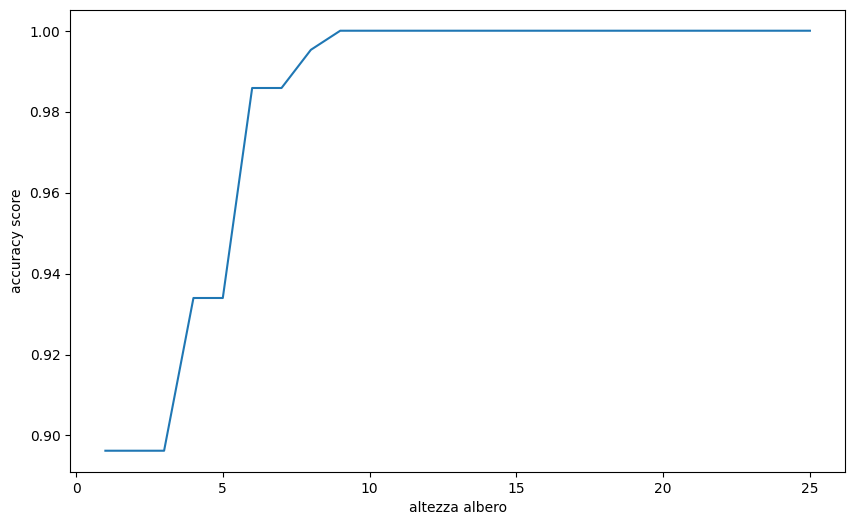

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#array di altezza ed accuratezza per il plot
altezza=[]
accuratezza=[]
maxAccuratezza=-1
bestAltezza=0
#imposto la massima altezza per il ciclo pari al numero di colonne del X_training
maxH=X_training.shape[1]
for i in range(1,maxH):
  start=time.time()
  #classe albero
  albero = DecisionTree(maxProfondita=i)
  #creo l' albero
  albero.inizializza(X_training, Y_training)
  end=time.time()
  t1=end-start
  start=time.time()
  #eseguo la predizione
  predictions = albero.predict(X_test)
  end=time.time()
  t2=end-start
  #eseguo test accuracy_score di sklearn
  acc = accuracy_score(Y_test, predictions)
  accuratezza.append(acc)
  altezza.append(i)
  #calcola ad una nuova prodondita finche non
  #incotra un accuratezza minore della precendente
  if acc>maxAccuratezza:
    maxAccuratezza=acc
    bestAltezza=i
    bestPrediction=predictions
  print("tempo per inizializzazione albero: ",t1,"s")
  print("tempo per calcolo predizione: ",t2,"s")
  print('il mio accuracy_score: ',acc ,'ad altezza',i)

#plot dei risultati della predizione alle varie altezze dell' albero
plt.figure(figsize=(10, 6))
plt.plot(altezza,accuratezza)
plt.xlabel("altezza albero")
plt.ylabel("accuracy score")
plt.show()

#parte di sklearn per il confronto
sklean_tree = DecisionTreeClassifier()
sklean_tree.fit(X_training, Y_training)
predizione_sklearn = sklean_tree.predict(X_test)


mia accuracy_score 1.0
sklearn accuracy_score:  0.9858490566037735
mia roc_auc_score:  1.0
sklearn roc_auc_score:  0.9861742424242425


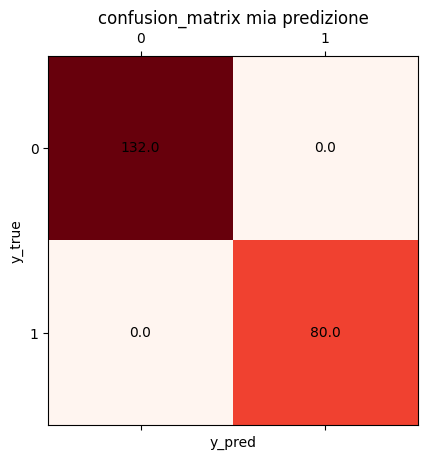

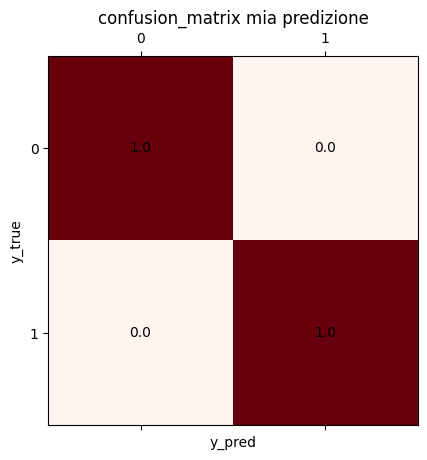

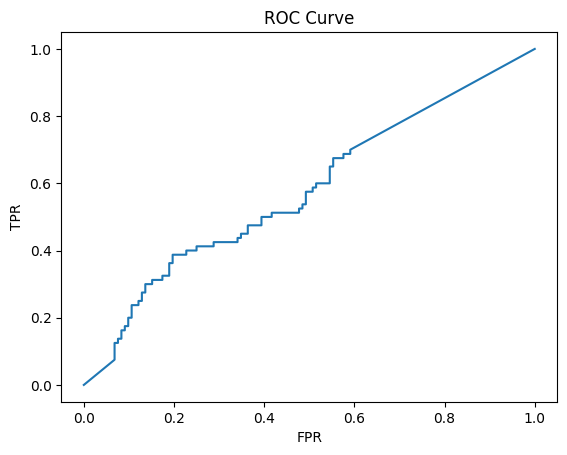

In [ ]:

#accuracy_score
print('mia accuracy_score',maxAccuratezza);
print('sklearn accuracy_score: ',accuracy_score(Y_test, predizione_sklearn))

#roc_auc_score
print("mia roc_auc_score: ",roc_auc_score(Y_test, bestPrediction))
print("sklearn roc_auc_score: ",roc_auc_score(Y_test, predizione_sklearn))

#confusion_matrix
def plot_cm(dataset):
  fig, ax= plt.subplots()
  ax.matshow(dataset, cmap='Reds')
  for (i, j), z in np.ndenumerate (dataset):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
  plt.title("confusion_matrix mia predizione")
  plt.xlabel("y_pred")
  plt.ylabel("y_true")
  plt.show()

cm=confusion_matrix(Y_test, bestPrediction)
plot_cm(cm)
cm=confusion_matrix(Y_test, bestPrediction, normalize="true")
plot_cm(cm)

#ROC Curve
n_true=len(Y_test)//9
n_false=len(Y_test)-n_true
preds_for_label_true= np.random.normal(0.8, 0.5, n_true).clip(0, 1)
preds_for_label_false= np.random.normal(0.2, 0.5, n_false).clip(0, 1)
y_score= np.append(preds_for_label_true, preds_for_label_false)
fpr, tpr, thresholds= roc_curve (bestPrediction, y_score=y_score)
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()


#Commento finale
Regressione:
I modelli usati per la regressione:

*   Regressione lineare(equazione normale)
*   Regressione lineare(SGD/GD)
*   Rete neurale per la regressione

La regressione lineare calcolata con la formula dell' equazione normale ci da direttamente come risultato i valori dei parametri che rendono minimo il valore della funzione obiettivo, che è molto simile al minimo riportato dalla regressione lineare con GD/SGD i quali eseguono la discesa del gradiente. In SGD/GD si è visto il diverso comportamento della discesa del gradiente in base al valore di learning rate, un learning rate troppo altro non garantisce una buona esplorazione nella ricerca di valori che minimizzino la funzione di loss.  
La rete neurale ha una complessità maggiore in funzione sopratutto della scelta del numero di hidden layer ed il numero di neuroni per ognuno di essi. Rispetto alla regressione lineare, sia con la formula dell' equazione normale che con SGD/GD, scegliendo i giusti iperparametri si possono ottenere valori più bassi per le metriche di valutazione, anche se possono portare ad una maggior complessità temporale. L'utilizzo di differenti solver, come adam, può migliorare l'efficienza temporale della rete eseguendo una diversa esplorazione dello spazio dei parametri nella ricerca di un minimo nella funzione di loss.

Classificazione:
I modelli usati per la classificazione:

*   K-nearest neighbors(KNN)
*   Logistic Regression
*   Decision Tree

Il miglior risultato ottenuto è tramite il decision tree, come si è mostrato nei grafici si vede un miglioramento dell' accuracy score in funzione della profondità fino al raggiungimento di un valore costante. K-nearest neighbors(KNN) ci riporta dei valori varianti in base al valore K scelto, ma nella maggior parte dei casi un valore K basso ci riporta un miglior risultato nell' accuratezza come mostrato nel grafico. Logistic Regression ottiene ottimi risultati trovando il giusto valore di learning rate per ridurre la funzione di costo.

In generale la scelta degli iperparametri,come mostrato nei vari output, sia per i modelli per la regressione che per la classificazione, influenzano molto le prestazioni del modello stesso, quindi esiste un tradeoff tra il tempo di elaborazione complessivo ed il miglior risultato ottenibile.




